In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(centers=5, random_state=42)

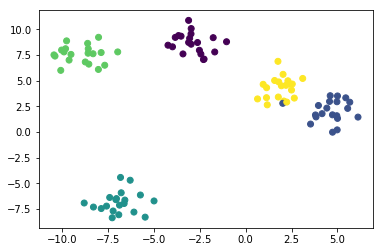

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
X.shape

(100, 2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()

In [93]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
model.coef_

array([[ 0.15723405,  0.56059404],
       [ 1.60425863, -1.04393857],
       [-0.43230329, -1.21957208],
       [-0.46864287,  0.17569381],
       [ 0.25639893,  0.08000686]])

In [95]:
model.intercept_

array([-3.98821934, -1.27601734, -0.46895235, -4.02761111, -1.45528081])

In [97]:
model.predict_proba(X[:6])

array([[4.27442760e-04, 1.32330759e-03, 8.59942819e-01, 1.11682049e-01,
        2.66243816e-02],
       [4.70196217e-01, 2.57095374e-02, 3.47512197e-04, 2.28021694e-02,
        4.80944564e-01],
       [5.80701046e-01, 3.14077007e-07, 6.67786421e-05, 2.42565859e-01,
        1.76666002e-01],
       [2.57103962e-01, 6.11328800e-02, 2.12983725e-02, 5.24922881e-02,
        6.07972497e-01],
       [1.75903436e-01, 1.83415419e-10, 6.60562998e-03, 7.76590340e-01,
        4.09005932e-02],
       [6.99306348e-05, 6.82034005e-03, 8.71608563e-01, 1.04572507e-01,
        1.69286591e-02]])

In [87]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        
        self.classes = np.unique(y)
        
        thetas = []
        
        for item in self.classes:
            y_mod = (y==item).astype(int)
            self.__theta = np.random.randn(X.shape[1], 1)
            for i in range(self.max_iters):
                self.gradient_accend(X, y)
            
            thetas.append(self.__theta)
            
        arr = np.hstack(thetas)
        self.coef_ = arr[1:, :]
        self.intercept_ = arr[0, :]
        self.thetas = arr
    
    def gradient_accend(self, X, y):
        delta_theta = self.gradient(X, y)
        self.__theta += delta_theta
        
    def gradient(self, X, y):
        yh = self.hypothesis(X)
        ya = y.reshape(-1, 1)
        diff = (yh - ya)
        
        dll2theta = np.dot(X.T, diff) / len(X)
        return -dll2theta*self.lr
    
    def hypothesis(self, X):
        g = np.dot(X, self.__theta)
        return 1/(1 + np.exp(-g))
    
    def predict_proba(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        g = np.dot(X, self.thetas)
        return 1/(1 + np.exp(-g))
    
    def predict(self, X):
        values = self.predict_proba(X)
        
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean((yp==y))
        

In [88]:
model = CustomLogisticReg(lr=.1, max_iters=100)

In [89]:
model.fit(X, y)

(3, 5)


In [90]:
model.intercept_

array([10.62882923, 11.38282563, 11.88346303, 12.32736351, 13.1765538 ])

In [91]:
model.predict(X[:6])

[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.99999238 0.99999276 0.99999387 0.99999447 0.99999427]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])